# Scatter plots from a Dataframe

#### References:

 - [seaborn.scatterplot (documentation)](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
 - [seaborn.joinplot (documentation)](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### dyamond dataset

In [2]:
df = sns.load_dataset('tips')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [3]:
# data selection
colname_x = 'tip'
colname_y = 'total_bill'
colname_cat1 = 'sex'
colname_cat2 = 'smoker'
colname_cat3 = 'day'
colname_num1 = 'size'

## scatterplot

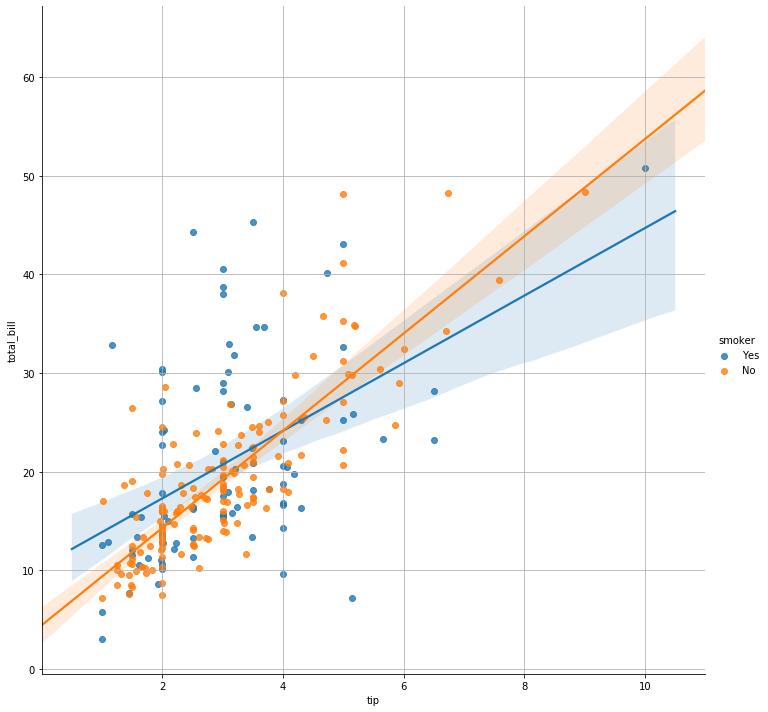

In [80]:
def plot(df:'dataframe', colname_x:str, colname_y:str, kind:str = 'scatter', size:int = 10, colname_color:str = '', colname_style:str = '', colname_size:str = '', title:str = '', grid:bool = True):
    # arguments validation
    colnames = df.columns.tolist()
    assert colname_x in colnames and colname_y in colnames, "columns x/y not available."
    if colname_color != '': assert colname_color in colnames, "column '%s' is not available."%colname_color
    if colname_style != '': assert colname_style in colnames, "column '%s' is not available."%colname_style
    if colname_size != '': assert colname_size in colnames, "column '%s' is not available."%colname_size
    # create figure
    if (colname_color != '' or colname_style != '' or colname_size != '') and kind != 'reg': fig = plt.figure(figsize = (size,size))
    # displaying cases
    if colname_color != '' and colname_style == '' and colname_size == '': 
        if kind == 'reg': 
            g = sns.lmplot(x=colname_x, y=colname_y, hue = colname_color, data=df, legend="full", height = size)
            ax = g.fig.gca()
        else: 
            ax = sns.scatterplot(x=colname_x, y=colname_y, hue = colname_color, data=df, legend="full")
    elif colname_color == '' and colname_style != '' and colname_size == '': 
        if kind == 'reg': 
            g = sns.lmplot(x=colname_x, y=colname_y, hue = colname_style, data=df, legend="full", height = size)
            ax = g.fig.gca()
        else: 
            ax = sns.scatterplot(x=colname_x, y=colname_y, style = colname_style, data=df, legend="full")
    elif colname_color == '' and colname_style == '' and colname_size != '': 
        if kind == 'reg': 
            g = sns.lmplot(x=colname_x, y=colname_y, hue = colname_size, data=df, legend="full", height = size)
            ax = g.fig.gca()
        else: 
            ax = sns.scatterplot(x=colname_x, y=colname_y, style = colname_size, data=df, legend="full")
    elif colname_color != '' and colname_style != '' and colname_size == '': 
        if kind == 'reg': 
            g = sns.lmplot(x=colname_x, y=colname_y, hue = colname_color, col = colname_style, data=df, legend="full", height = size)
            ax = g.fig.gca()
            grid = False
        else: 
            ax = sns.scatterplot(x=colname_x, y=colname_y, hue = colname_color, style = colname_style, data=df, legend="full")
    elif colname_color != '' and colname_style == '' and colname_size != '': 
        if kind == 'reg': 
            g = sns.lmplot(x=colname_x, y=colname_y, hue = colname_color, col = colname_size, data=df, legend="full", height = size)
            ax = g.fig.gca()
            grid = False
        else: 
            ax = sns.scatterplot(x=colname_x, y=colname_y, hue = colname_color, size = colname_size, data=df, legend="full")
    elif colname_color == '' and colname_style != '' and colname_size != '': 
        if kind == 'reg': 
            g = sns.lmplot(x=colname_x, y=colname_y, hue = colname_style, col = colname_size, data=df, legend="full", height = size)
            ax = g.fig.gca()
            grid = False
        else:
            ax = sns.scatterplot(x=colname_x, y=colname_y, style = colname_style, size = colname_size, data=df, legend="full")
    elif colname_style != '' and colname_color != '' and colname_size != '': 
        if kind == 'reg': 
            g = sns.lmplot(x=colname_x, y=colname_y, hue = colname_color, col = colname_style, row = colname_size, data=df, legend="full", height = size)
            ax = g.fig.gca()
            grid = False
        else:
            ax = sns.scatterplot(x=colname_x, y=colname_y, hue = colname_color, style = colname_style, size = colname_size, data=df, legend="full")
    else: 
        g = sns.jointplot(x=colname_x, y=colname_y, data=df, height = size, kind = kind)
        ax = g.fig.gca()
        grid = False
    # title
    if title != '': ax.set_title(title, fontsize = 12)
    # plot grid axis
    if grid: ax.xaxis.grid(True)
    if grid: ax.yaxis.grid(True)
    # display
    plt.show()
    
plot(df, colname_x, colname_y, kind = 'reg', colname_color = colname_cat2)

In [31]:
help(sns.scatterplot)

Help on function scatterplot in module seaborn.relational:

scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)
    Draw a scatter plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can